<a href="https://colab.research.google.com/github/avihu2929/MachineLearningProjects/blob/main/original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


# Data preprocessing (10%)

In [ ]:

from sklearn.utils import shuffle

#Select 2 classes
filter = np.where((y == '0' ) | (y == '1'))
X, y = X[filter], y[filter]

#Shuffle and split into train and test
X, y = shuffle(X, y)

X_train, X_test = np.split(X,[10000])
Y_train, Y_test = np.split(y,[10000])

#Feature scaling
examples = Y_train.shape[0]
Y_train = Y_train.reshape(1, examples)
examples = Y_test.shape[0]
Y_test = Y_test.reshape(1, examples)

X_train = X_train / 255
X_train = X_train.T
X_test = X_test / 255
X_test = X_test.T


Test yourself

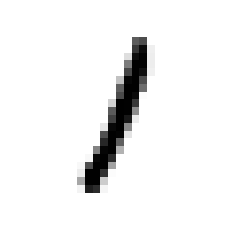

'1'

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[0,i]

# Activation functions (10%)

Text(0, 0.5, 'sigmoid(z)')

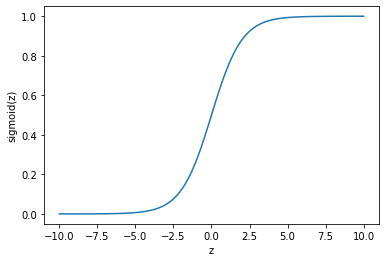

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-1.0 * z))
    return s

z = np.linspace(-10, 10, 100) 
a = sigmoid(z)
plt.plot(z, a) 
plt.xlabel("z") 
plt.ylabel("sigmoid(z)")

# Loss function (20%)

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    #print(y_hat,y)
    if  (y_hat ==0)|(y_hat ==1):
      y_hat = 0.5
     # print("Ysss: ",y_hat)
    cost = -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
    
    if(y_hat == 0):
      if y ==1:
        cost = 100000
      if y==0:
        cost = 0
    if(y_hat ==1):
      if y==0:
        cost = 100000
      if y==1:
        cost = 0

    return cost

# NN Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 128
learning_rate = 0.025
epochs = 150
print(input_layer)

784


# Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)


(128, 784)
(128, 1)
(1, 128)
(1, 1)


# Train (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = len(X)

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
   
    # TODO :  Forward propagation
    Z1 = np.matmul(W1,X[:,j])
    b1=np.squeeze(np.asarray(b1))
    Z1 = Z1+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)
    Z2 = Z2+b2
    Z2=np.squeeze(np.asarray(Z2),axis=0)
    A2 = sigmoid(Z2)
    Yout = int(Y[0,j])

    # TODO: Compute loss
    loss = log_loss(A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss / numOfTraining



    # Back propagation
    dZ2 = A2 - Yout
    dZ2a = np.squeeze(np.asarray(dZ2))
    dW2 = (1 / numOfTraining) * np.dot(dZ2a, A1)
    db2 = (1 / numOfTraining) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = A1 - np.power(A1, 2)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), dA1)
    x1 = np.matrix(X[:,j])
    x1=x1.transpose()
    dZ1m = np.matrix(dZ1)
    dW1 = (1 / numOfTraining) * np.dot(dZ1m.T, x1.T)
    db1 = (1 / numOfTraining) * np.sum(dZ1, axis=0, keepdims=True)

    # TODO: Update weights
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1=np.array(W1)
    
  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(loss)
  epoch_list.append(i)

  print("Epoch", i," Loss:", avg_epoch_loss)



Epoch 0  Loss: [0.00206824]
Epoch 1  Loss: [0.00198793]
Epoch 2  Loss: [0.00191272]
Epoch 3  Loss: [0.00184208]
Epoch 4  Loss: [0.00177559]
Epoch 5  Loss: [0.00171288]
Epoch 6  Loss: [0.00165362]
Epoch 7  Loss: [0.00159753]
Epoch 8  Loss: [0.00154436]
Epoch 9  Loss: [0.00149391]
Epoch 10  Loss: [0.00144599]
Epoch 11  Loss: [0.00140041]
Epoch 12  Loss: [0.00135704]
Epoch 13  Loss: [0.00131574]
Epoch 14  Loss: [0.00127637]
Epoch 15  Loss: [0.00123884]
Epoch 16  Loss: [0.00120302]
Epoch 17  Loss: [0.00116882]
Epoch 18  Loss: [0.00113616]
Epoch 19  Loss: [0.00110495]
Epoch 20  Loss: [0.00107511]
Epoch 21  Loss: [0.00104656]
Epoch 22  Loss: [0.00101924]
Epoch 23  Loss: [0.00099307]
Epoch 24  Loss: [0.00096801]
Epoch 25  Loss: [0.00094399]
Epoch 26  Loss: [0.00092096]
Epoch 27  Loss: [0.00089886]
Epoch 28  Loss: [0.00087765]
Epoch 29  Loss: [0.00085728]
Epoch 30  Loss: [0.00083771]
Epoch 31  Loss: [0.00081891]
Epoch 32  Loss: [0.00080082]
Epoch 33  Loss: [0.00078342]
Epoch 34  Loss: [0.00076

# Visualization

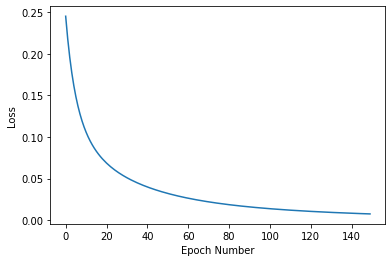

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

# Test your performance (30%)

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test)
A1 = sigmoid(Z1)
Z2 = np.dot(W2,A1)
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))


[[1]]


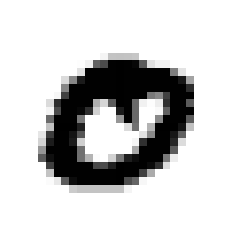

Real= 0 Predicted= 0.00038821820592770356


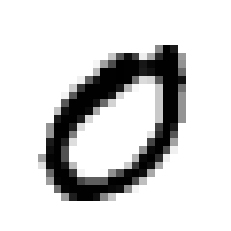

Real= 0 Predicted= 0.0024542230127212222


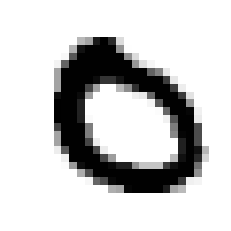

Real= 0 Predicted= 0.08787549575212007


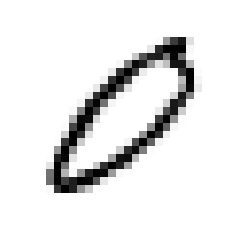

Real= 0 Predicted= 0.00680052501423528


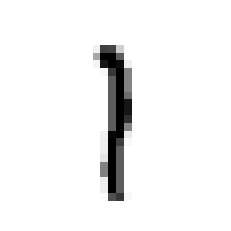

Real= 1 Predicted= 0.9675310794471825


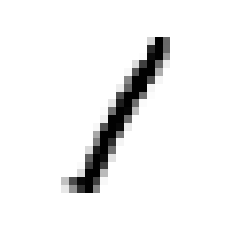

Real= 1 Predicted= 0.9951952904933717


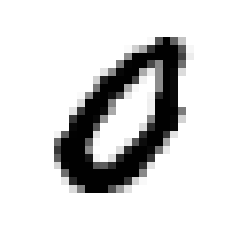

Real= 0 Predicted= 0.016265733356695147


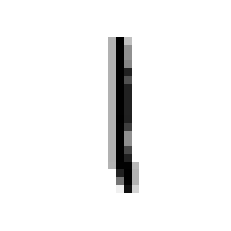

Real= 1 Predicted= 0.9974711392092768


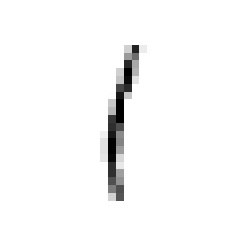

Real= 1 Predicted= 0.9992088180964719


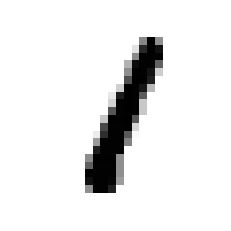

Real= 1 Predicted= 0.9860349398304157


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

for i in range(0, 10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[0,i]

  Z1 = np.matmul(W1,X_test[:,i]) 
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2,A1)
  A2 = sigmoid(Z2)
  Yout = Y[0,i] 
  print("Real=", Y_test[0,i], "Predicted=",float(A2))



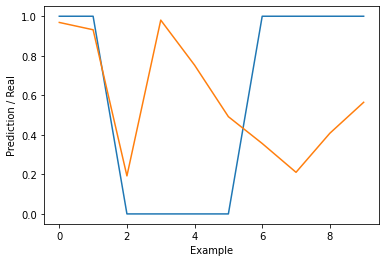

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Example')
plt.ylabel("Prediction / Real")

numofexample=[0,1,2,3,4,5,6,7,8,9]
predicts = []
Yreal = []

for i in range(0, 10):

    Z1 = np.matmul(W1,X_test[:,i])+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    Yout = int(Y[0,i]) 
    
    Yreal.append(Yout)
    predicts.append(A2[0])


plt.plot(numofexample,Yreal)
plt.plot(numofexample,predicts)



In [ ]:
n0=0
tp0=0
n1=0
tp1=0
for i in range(1, 4700):

    Z1 = np.matmul(W1,X_test[:,i]) +b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    Yout = Y[0,i] 
    if Yout == '0':
      n0=n0+1
      if A2<0.5:
        tp0=tp0+1
    if Yout == '1':
      n1=n1+1
      if A2>0.5:
        tp1=tp1+1

    
print("   n    tp")
print("0 ",n0,tp0)
print("1 ",n1,tp1)




   n    tp
0  2185 1283
1  2514 1870


# Test our model yourself

fatal: destination path '8409b3feec20f159d8a50b0a811d3bca' already exists and is not an empty directory.
Draw 0 or 1 here:


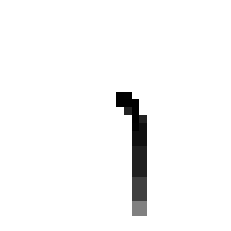

Predicted= 0.9688194940884354


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git

%run /content/8409b3feec20f159d8a50b0a811d3bca/draw.py
print("Draw 0 or 1 here:")
draw(filename = "image.png", w=28, h=28, line_width=1)
from PIL import Image
import numpy

img= Image.open("/content/image.png")
np_img = numpy.array(img)


plt.imshow(np_img[:,:,3], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
result = np_img[:,:,3].flatten()

Z1 = np.matmul(W1,result) +b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2,A1)+b2
A2 = sigmoid(Z2)

print("Predicted=",float(A2))

In [25]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


from google.colab import drive
drive.mount('/content/drive')

!cp drive/My Drive/Colab Notebooks/Untitled.ipynb ./

!jupyter nbconvert --to PDF "Untitled.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain